In [1]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import cleantext

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\welin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\welin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
df = pd.read_csv('news_sample.csv')
def clean_module(text):
    return cleantext.clean(text, clean_all= False, # Execute all cleaning operations
    extra_spaces=True ,  # Remove extra white spaces 
    lowercase=True ,# Convert to lowercase
    numbers=True ,# Remove all digits 
    punct=True ,# Remove all punctuations
    reg=r'[^\w\s]'
      # Language for stop words
    )
def rem_stopwords(text):
    return cleantext.clean(text,stopwords=True)
def stem(text):
  return cleantext.clean(text,stemming=True)
def count_words(text):
    return len(text.split())
df['content'] = df['content'].apply(clean_module)
vocab_sum = df['content'].str.split().apply(len).sum()
tokenlist = df['content'].apply(word_tokenize).tolist()
df['content'] = df['content'].apply(rem_stopwords)
filtered_sum= df['content'].str.split().apply(len).sum()
stopwordlist = df['content'].apply(word_tokenize).tolist()
df['content'] = df['content'].apply(stem)
stemmed_sum = df['content'].str.split().apply(len).sum()
print("Vocabulary size:", vocab_sum ) 
print("Vocabulary size without stopwords:",  filtered_sum, ", resulting in reduction rate:", filtered_sum/vocab_sum)
print("Vocabulary size after stemming with no stopwords:", stemmed_sum, ", resulting in reduction rate:", stemmed_sum/filtered_sum)


Vocabulary size: 167343
Vocabulary size without stopwords: 94020 , resulting in reduction rate: 0.5618400530646636
Vocabulary size after stemming with no stopwords: 94020 , resulting in reduction rate: 1.0


Observations: 

  1.All articles from www.newsmax.com, willyloman.wordpress and wallstreetonparade.com do not have a type.

2. The ids go up with the article order

3. The average amount of stemmed words change with each type, this is however a small sample size for a lot of the types.

4. The count of types vary a lot, 62% are "fake", yet only 1/250 is "clickbait" or "hate".

5. The words a more evenly spread without stopwords (see graphs below)


C:\Users\Niller\AppData\Local\Temp\ipykernel_6028\3680508902.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


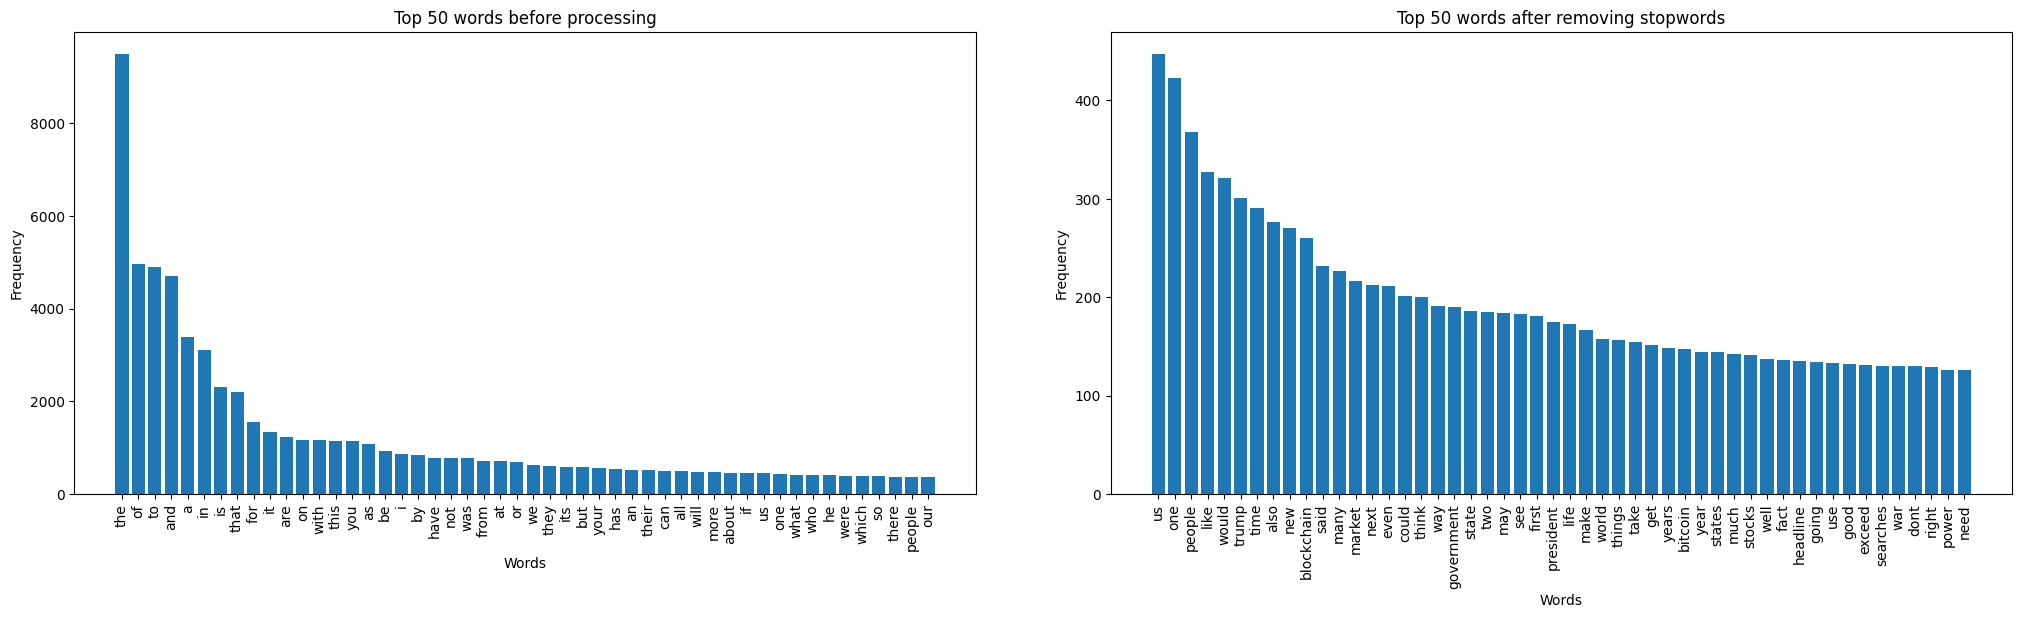

In [11]:

from collections import Counter
import matplotlib.pyplot as plt
# Use Counter to count the frequency of each word
word_counts = Counter(sum(tokenlist, []))

# Get the 50 most common words
top_words = word_counts.most_common(50)

# Separate out the words and their counts
word_labels = [word[0] for word in top_words]
word_freqs = [word[1] for word in top_words]

import matplotlib.pyplot as plt
from collections import Counter

# Create the first subplot
plt.subplots(figsize=(25, 6))
plt.subplot(1, 2, 1)
plt.title('Top 50 words before processing')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.bar(word_labels, word_freqs)
plt.xticks(rotation=90)

# Create the second subplot
word_counts = Counter(sum(stopwordlist, []))
top_words = word_counts.most_common(50)
word_labels = [word[0] for word in top_words]
word_freqs = [word[1] for word in top_words]

plt.subplot(1, 2, 2)
plt.title('Top 50 words after removing stopwords')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.bar(word_labels, word_freqs)
plt.xticks(rotation=90)

# Show the figure
plt.subplots_adjust(wspace=0.15) # adjust the width space between subplots
plt.show()

In [8]:
import pandas as pd

# Set the file path
file_path = 'news_cleaned_2018_02_13.csv'

# Determine the number of rows to skip based on the 10% sampling rate
num_rows = sum(1 for line in open(file_path, encoding='utf-8')) // 10

# Load the data, skipping every 10th row
dff = pd.read_csv(file_path, skiprows=lambda i: i % 10 != 0, encoding='utf-8')


C:\Users\Niller\AppData\Local\Temp\ipykernel_6028\878537374.py:10: DtypeWarning: Columns (0,1,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  dff = pd.read_csv(file_path, skiprows=lambda i: i % 10 != 0, encoding='utf-8')


In [9]:
def clean_module(text):
    return cleantext.clean(text, clean_all= False,
extra_spaces=True , 
stemming=True , 
stopwords=True ,
lowercase=True ,
numbers=True , 
punct=True ,
reg=r'[^\w\s]',
stp_lang='english'
  # Language for stop words
)
dff = dff.loc[dff['content'].apply(lambda x: not isinstance(x, float))] #Removes rows where content is a float to avoid errors
dff['content'] = dff['content'].apply(clean_module)
print(dff)


       Unnamed: 0       id                 domain        type  \
0               9       15  blackagendareport.com  unreliable   
1              19       26                awm.com  unreliable   
2              29       36      beforeitsnews.com        fake   
3              39       49                awm.com  unreliable   
4              49       59     barenakedislam.com        hate   
...           ...      ...                    ...         ...   
852898       8906  9878247            nytimes.com    reliable   
852899       8916  9878257            nytimes.com    reliable   
852900       8926  9878267            nytimes.com    reliable   
852901       8936  9878277            nytimes.com    reliable   
852902       8946  9878287            nytimes.com    reliable   

                                                      url  \
0       https://blackagendareport.com/zambia-must-clar...   
1       http://awm.com/tourists-grow-nervous-as-they-a...   
2       http://beforeitsnews.com/pol

In [ ]:
df.to_csv('10percentcleandata.csv', index=False)

In [3]:
df = pd.read_csv('10percentcleandata.csv')

C:\Users\Niller\AppData\Local\Temp\ipykernel_6028\876483081.py:1: DtypeWarning: Columns (0,1,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('10percentcleandata.csv')


In [ ]:

unique_values = df['type'].unique()

# print the unique values
print(unique_values)


In [ ]:
# create a dictionary to map the values to "fake" or "true"
mapping = {'rumor': 'fake',
           'hate': 'fake',
           'unreliable': 'fake',
           'conspiracy': 'fake',
           'clickbait': 'fake',
           'satire': 'fake',
           'bias': 'fake',
           'junksci': 'fake',
           'political': 'reliable'}

# replace the values using the mapping dictionary
df['type'] = df['type'].replace(mapping)
# filter out the rows where 'Column1' is not equal to either "true" or "fake"
df = df[(df['type'] == 'reliable') | (df['type'] == 'fake')]

In [ ]:

unique_values = df['type'].unique()

# print the unique values
print(unique_values)

In [ ]:
#Simple model with only content
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Create a CountVectorizer object to transform the documents into a bag of words representation
vectorizer = CountVectorizer()

# Fit the vectorizer to the documents and transform them into a matrix of word counts
wordvector = vectorizer.fit_transform(df['content'])

# Print the vocabulary of the vectorizer (the unique words in the corpus)
print(vectorizer.vocabulary_)

train_size = int(len(df) * .8)
X_train = wordvector[:train_size]
y_train = df['type'][:train_size]

X_test = wordvector[train_size:]
y_test = df['type'][train_size:]

# Train a logistic regression classifier on the training data
clf = LogisticRegression()

clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
#Simple model with Domain also
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Create a CountVectorizer object to transform the documents into a bag of words representation
vectorizer = CountVectorizer()
# Create a new column in the dataframe for the domain information
#df['domain_info'] = df['domain'].astype(str)

# Concatenate the domain information with the content of each document
df['content'] = df['domain'] + df['content']
# Fit the vectorizer to the documents and transform them into a matrix of word counts
wordvector = vectorizer.fit_transform(df['content'])

# Print the vocabulary of the vectorizer (the unique words in the corpus)
print(vectorizer.vocabulary_)


train_size = int(len(df) * .8)
X_train = wordvector[:train_size]
y_train = df['type'][:train_size]

X_test = wordvector[train_size:]
y_test = df['type'][train_size:]

# Train a logistic regression classifier on the training data
clf = LogisticRegression()

clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [2]:
#Data for advanced model
df = pd.read_csv('10percentcleandata.csv')
mapping = {'rumor': 'unreliable',
           'hate': 'fake',
           'unreliable': 'unreliable',
           'conspiracy': 'unreliable',
           'clickbait': 'unreliable',
           'satire': 'satire',
           'bias': 'unreliable',
           'junksci': 'fake',}
df['type'] = df['type'].replace(mapping)
df = df[(df['type'] == 'reliable') | (df['type'] == 'fake')| (df['type'] == 'unreliable')| (df['type'] == 'satire')]
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)

C:\Users\welin\AppData\Local\Temp\ipykernel_17060\166894806.py:2: DtypeWarning: Columns (0,1,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('10percentcleandata.csv')


We chose to split our articles into 4 types: "unreliable" (composed of "rumor", "conspiracy", "clickbait", "bias" and ofc itself), "fake" which is composed of "hate","junksci" and itself, "satire" which is only composed of itself and "reliable" which is only composed of itself. We chose to eliminate all the articles flagged as "political" as we don't see it fit in with any of the other categories since it by itself doesn't say anything about the truthfullness of the article.

In [3]:
#Find best NN parameter
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(df) * .8)
train_content = df['content'][:train_size]
train_type = df['type'][:train_size]
test_content = df['content'][train_size:]
test_type = df['type'][train_size:]

# Define a range of initial neuron values to try
neuron_values = [128, 256, 512, 1024, 2048]

# Set the other hyperparameters
max_words = 2000
batch_size = 1024
epochs = 1
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_content)
x_train = tokenize.texts_to_matrix(train_content)
x_test = tokenize.texts_to_matrix(test_content)
encoder = LabelEncoder()
encoder.fit(train_type)
y_train = encoder.transform(train_type)
y_test = encoder.transform(test_type)
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
# Train and evaluate the models for different numbers of neurons
for num_neurons in neuron_values:
    print(f"Training model with {num_neurons} neurons...")
    # Build the model
    model = Sequential()
    model.add(Dense(num_neurons, input_shape=(max_words,)))
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_split=0.1)

    # Evaluate the model on the test set
    score = model.evaluate(x_test, y_test,
                           batch_size=batch_size,
                           verbose=1)
    print(f"Test accuracy for {num_neurons} neurons: {score[1]}")


Training model with 128 neurons...
120/120 [==============================] - 1s 7ms/step - loss: 0.3509 - accuracy: 0.8731
Test accuracy for 128 neurons: 0.8730735778808594
Training model with 256 neurons...
120/120 [==============================] - 2s 12ms/step - loss: 0.3268 - accuracy: 0.8799
Test accuracy for 256 neurons: 0.8799112439155579
Training model with 512 neurons...
120/120 [==============================] - 3s 20ms/step - loss: 0.3139 - accuracy: 0.8850
Test accuracy for 512 neurons: 0.8849555253982544
Training model with 1024 neurons...
120/120 [==============================] - 4s 31ms/step - loss: 0.3017 - accuracy: 0.8898
Test accuracy for 1024 neurons: 0.8898196816444397
Training model with 2048 neurons...
120/120 [==============================] - 10s 76ms/step - loss: 0.2865 - accuracy: 0.8940
Test accuracy for 2048 neurons: 0.8940287232398987


We see that the best model was with 2048 neurons so we'll train a model below with 2048 neurons that use a larger batch size and two epochs

In [4]:
#Full model training:
batch_size = 32
epochs = 2
model = Sequential()
model.add(Dense(2048, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_split=0.1)

    # Evaluate the model on the test set
score = model.evaluate(x_test, y_test,
    batch_size=batch_size,
    verbose=1)
print(f"Final test accuracy: {score[1]}")

Epoch 1/2
13739/13739 [==============================] - 794s 58ms/step - loss: 0.3089 - accuracy: 0.8861 - val_loss: 0.2545 - val_accuracy: 0.9065
Epoch 2/2
3817/3817 [==============================] - 28s 7ms/step - loss: 0.2761 - accuracy: 0.9035
Final test accuracy: 0.9035113453865051


In [5]:
print(f"Final test accuracy: {score[1]}")

Final test accuracy: 0.9035113453865051
